<a href="https://colab.research.google.com/github/Milena-DataScientist/CarMax/blob/main/Milena_CarMax2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'pickle'>**Import/Install the packages**




In [2]:
if 'google.colab' in str(get_ipython()):
    print('Running on Colab')
else:
    print('Not Running on Colab')

Running on Colab


In [3]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
if 'google.colab' in str(get_ipython()):
  !pip install --upgrade feature_engine scikit-learn learning -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.0/290.0 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 45.4 MB/s eta 0:00:00


In [5]:
from sklearn import preprocessing
from feature_engine.imputation.categorical import CategoricalImputer
from feature_engine.imputation.missing_indicator import AddMissingIndicator
"""Importing the required packages"""

import feature_engine
import sklearn

# For DataFrames and manipulations
import pandas as pd
import numpy as np

# For data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import loguniform, uniform, randint, truncnorm
%matplotlib inline

# save and load models
import joblib

# Pathlib to navigate file system
from pathlib import Path
import sys

# For splitting the dataset
from sklearn.model_selection import train_test_split

#To drop features
from feature_engine.selection import DropFeatures

#missing values imputers
from feature_engine.imputation import ArbitraryNumberImputer, MeanMedianImputer, AddMissingIndicator, CategoricalImputer, RandomSampleImputer

# For categorical variables
from feature_engine.encoding import OneHotEncoder, DecisionTreeEncoder
from feature_engine.encoding import RareLabelEncoder

# CustomTransform
from sklearn.base import BaseEstimator, TransformerMixin

# For scaling the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import TransformedTargetRegressor

# creating pipelines 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

# Data classifiers
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

# Using KNN regressor to our data
from sklearn.neighbors import KNeighborsRegressor

# draws a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix

# We will use this to download the Dataset
from sklearn.datasets import fetch_openml

# feature engine log transformation
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import YeoJohnsonTransformer

#Discretization
from sklearn.preprocessing import KBinsDiscretizer

#Handling Outliers
from feature_engine.outliers import Winsorizer

# feature engine wrapper 
from feature_engine.wrappers import SklearnTransformerWrapper

# <font color = 'pickle'> **Specify Project Folder Location**

In [6]:
if 'google.colab' in str(get_ipython()):
    base_folder = Path('/content/drive/MyDrive/CarMax/')
else:
    base_folder = Path('/content/drive/MyDrive/Data')

In [7]:
data_folder = base_folder/'Datasets'
save_model_folder = base_folder/'models'
custom_function_folder = base_folder/'CustomFunctions'
save_model_folder.mkdir(exist_ok=True, parents=True)

# <font color = 'pickle'> **Import Custom Functions from Python file**

In [8]:
%load_ext autoreload
%autoreload 2

In [9]:
sys.path.append(str(custom_function_folder))

In [10]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.8/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/CarMax/CustomFunctions']

In [11]:
from plot_learning_curve import plot_learning_curve

In [12]:
from eda_plots import diagnostic_plots, plot_target_by_category

#<font color = 'pickle'> **Obtaining Data** </font>


## **<font color ='orange'>Attribute Information:**</font>

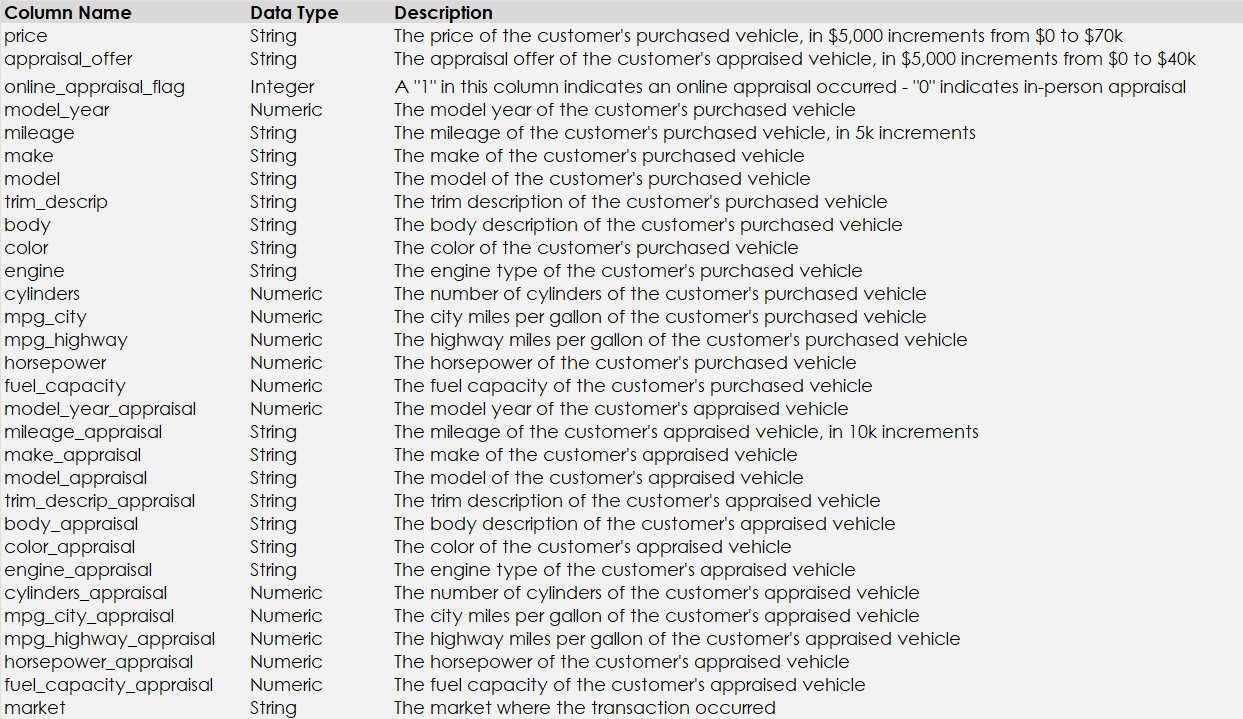

In [13]:
cm = pd.read_csv(data_folder/"ShowcaseDataWinter2023.csv", encoding= 'unicode_escape')

#<font color ='pickle'>**EDA and identifying the preprocessing steps.** 


# <font color = 'pickle'>**Exploratory data analysis**

## **<font color ='orange'>Checking Data**</font>

### <font color = 'Orange'>**Checking a few rows**

In [ ]:
cm.head()

,price,appraisal_offer,online_appraisal_flag,model_year,mileage,make,model,trim_descrip,body,color,...,trim_descrip_appraisal,body_appraisal,color_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market
0,$20k to $25k,$0k to $5k,1.0,2014.0,15k to 20k miles,HDT,HDT_12,Premium,E,Red,...,NaN,D,Silver,4.0L,6,17.0,21,236,21.0,13
1,$15k to $20k,$0k to $5k,0.0,2006.0,100k+ miles,KQZ,KQZ_23,Premium,E,Silver,...,Not Premium,D,Gold,4.2L,6,16.0,21,205,25.0,11
2,$30k to $35k,$35k to $40k,1.0,2014.0,5k to 10k miles,CZV,CZV_10,Premium,E,Black,...,NaN,E,Red,2.0L,4,41.0,38,181,10.0,13
3,$35k to $40k,$5k to $10k,1.0,2014.0,15k to 20k miles,IZA,IZA_19,Premium,F,Silver,...,Premium,F,Blue,3.0L,6,17.0,25,230,16.0,13
4,$30k to $35k,$15k to $20k,1.0,2011.0,35k to 40k miles,HDT,HDT_8,Premium,F,Blue,...,Not Premium,E,Black,2.4L,4,20.0,29,182,18.0,16


### <font color = 'Orange'>**Checking column names and data types**

In [ ]:
cm.columns

Index(['price', 'appraisal_offer', 'online_appraisal_flag', 'model_year',
       'mileage', 'make', 'model', 'trim_descrip', 'body', 'color', 'engine',
       'cylinders', 'mpg_city', 'mpg_highway', 'horsepower', 'fuel_capacity',
       'model_year_appraisal', 'mileage_appraisal', 'make_appraisal',
       'model_appraisal', 'trim_descrip_appraisal', 'body_appraisal',
       'color_appraisal', 'engine_appraisal', 'cylinders_appraisal',
       'mpg_city_appraisal', 'mpg_highway_appraisal', 'horsepower_appraisal',
       'fuel_capacity_appraisal', 'market'],
      dtype='object')

In [ ]:
cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    200000 non-null  object 
 1   appraisal_offer          200000 non-null  object 
 2   online_appraisal_flag    196166 non-null  float64
 3   model_year               200000 non-null  float64
 4   mileage                  200000 non-null  object 
 5   make                     200000 non-null  object 
 6   model                    200000 non-null  object 
 7   trim_descrip             176159 non-null  object 
 8   body                     189741 non-null  object 
 9   color                    199967 non-null  object 
 10  engine                   200000 non-null  object 
 11  cylinders                200000 non-null  int64  
 12  mpg_city                 199410 non-null  float64
 13  mpg_highway              199410 non-null  float64
 14  hors

### <font color = 'Orange'>**Checking for unique values**

In [ ]:
cm.nunique()

price                       13
appraisal_offer              9
online_appraisal_flag        2
model_year                  24
mileage                     21
make                        37
model                      575
trim_descrip                 2
body                         6
color                       16
engine                      49
cylinders                   10
mpg_city                    47
mpg_highway                 41
horsepower                 297
fuel_capacity               36
model_year_appraisal        32
mileage_appraisal           21
make_appraisal              38
model_appraisal            675
trim_descrip_appraisal       2
body_appraisal               8
color_appraisal             16
engine_appraisal            56
cylinders_appraisal          6
mpg_city_appraisal          50
mpg_highway_appraisal       44
horsepower_appraisal       339
fuel_capacity_appraisal     35
market                      16
dtype: int64

### <font color = 'Orange'>**Checking duplicate rows**

In [ ]:
print(cm.duplicated().any())

False


### <font color = 'Orange'>**Checking for missing values**

In [ ]:
cm.isna().sum()/200000*100  #percent of missing values 

price                       0.0000
appraisal_offer             0.0000
online_appraisal_flag       1.9170
model_year                  0.0000
mileage                     0.0000
make                        0.0000
model                       0.0000
trim_descrip               11.9205
body                        5.1295
color                       0.0165
engine                      0.0000
cylinders                   0.0000
mpg_city                    0.2950
mpg_highway                 0.2950
horsepower                  0.0000
fuel_capacity               0.0020
model_year_appraisal        0.0000
mileage_appraisal           0.0000
make_appraisal              0.0000
model_appraisal            10.7540
trim_descrip_appraisal     15.5400
body_appraisal              0.0000
color_appraisal             0.6590
engine_appraisal            0.0000
cylinders_appraisal         0.0000
mpg_city_appraisal          0.0005
mpg_highway_appraisal       0.0000
horsepower_appraisal        0.0000
fuel_capacity_apprai

In [ ]:
cm.isna().sum()

price                          0
appraisal_offer                0
online_appraisal_flag       3834
model_year                     0
mileage                        0
make                           0
model                          0
trim_descrip               23841
body                       10259
color                         33
engine                         0
cylinders                      0
mpg_city                     590
mpg_highway                  590
horsepower                     0
fuel_capacity                  4
model_year_appraisal           0
mileage_appraisal              0
make_appraisal                 0
model_appraisal            21508
trim_descrip_appraisal     31080
body_appraisal                 0
color_appraisal             1318
engine_appraisal               0
cylinders_appraisal            0
mpg_city_appraisal             1
mpg_highway_appraisal          0
horsepower_appraisal           0
fuel_capacity_appraisal      312
market                         0
dtype: int

### <font color = 'Orange'>**Checking summary Statistics**

In [ ]:
cm.describe().T

,count,mean,std,min,25%,50%,75%,max
online_appraisal_flag,196166.0,0.252949,0.434703,0.0,0.0,0.0,1.0,1.0
model_year,200000.0,2012.563570,2.111069,1991.0,2012.0,2013.0,2014.0,2017.0
cylinders,200000.0,4.965780,1.389352,0.0,4.0,4.0,6.0,16.0
mpg_city,199410.0,22.172118,5.238446,11.0,18.0,22.0,26.0,60.0
mpg_highway,199410.0,29.376671,5.678557,14.0,25.0,29.0,33.0,59.0
horsepower,200000.0,236.973075,76.622682,11.0,175.0,228.0,290.0,760.0
fuel_capacity,199996.0,17.579302,4.322564,1.0,14.0,17.0,19.0,48.0
model_year_appraisal,200000.0,2007.848445,4.872934,1986.0,2005.0,2009.0,2012.0,2017.0
cylinders_appraisal,200000.0,5.072170,1.329861,3.0,4.0,4.0,6.0,10.0
mpg_city_appraisal,199999.0,21.679143,5.482760,9.0,18.0,21.0,25.0,60.0


## **<font color ='orange'>Identifying numerical, categorical and discrete variables**</font>

In [ ]:
#list of categorical variabels
categorical = [var for var in cm.columns if cm[var].dtype.name =='object']

#list of discrete variables
discrete = [ var for var in cm.columns if cm[var].dtype.name != 'object'
              and len(cm[var].unique()) < 33]

# list of continous variables keeping our target variable out              
continuous = [var for var in cm.columns if  cm[var].dtype.name != 'object'
              and var not in discrete] # and var != '(Traget Variable)']

In [ ]:
categorical

['price',
 'appraisal_offer',
 'mileage',
 'make',
 'model',
 'trim_descrip',
 'body',
 'color',
 'engine',
 'mileage_appraisal',
 'make_appraisal',
 'model_appraisal',
 'trim_descrip_appraisal',
 'body_appraisal',
 'color_appraisal',
 'engine_appraisal']

In [ ]:
discrete

['online_appraisal_flag',
 'model_year',
 'cylinders',
 'model_year_appraisal',
 'cylinders_appraisal',
 'market']

In [ ]:
continuous

['mpg_city',
 'mpg_highway',
 'horsepower',
 'fuel_capacity',
 'mpg_city_appraisal',
 'mpg_highway_appraisal',
 'horsepower_appraisal',
 'fuel_capacity_appraisal']

### <font color = 'Orange'>**Checking unique values for variables**

In [ ]:
tot_unique_cat_val= cm[categorical].nunique()
for key,value in tot_unique_cat_val.items():
  if value >0:
    print(key, ':', value)

price : 13
appraisal_offer : 9
mileage : 21
make : 37
model : 575
trim_descrip : 2
body : 6
color : 16
engine : 49
mileage_appraisal : 21
make_appraisal : 38
model_appraisal : 675
trim_descrip_appraisal : 2
body_appraisal : 8
color_appraisal : 16
engine_appraisal : 56


In [ ]:
for var in categorical:
  print(var, cm[var].unique()[0:20], '\n')

price ['$20k to $25k' '$15k to $20k' '$30k to $35k' '$35k to $40k'
 '$45k to $50k' '$25k to $30k' '$40k to $45k' '$0 to $15k' '$55k to $60k'
 '$60k to $65k' '$65k to $70k' '$70k+' '$50k to $55k'] 

appraisal_offer ['$0k to $5k' '$35k to $40k' '$5k to $10k' '$15k to $20k' '$40k+'
 '$20k to $25k' '$10k to $15k' '$25k to $30k' '$30k to $35k'] 

mileage ['15k to 20k miles' '100k+ miles' '5k to 10k miles' '35k to 40k miles'
 '20k to 25k miles' '30k to 35k miles' '45k to 50k miles'
 '70k to 75k miles' '25k to 30k miles' '0 to 5k miles' '10k to 15k miles'
 '80k to 85k miles' '65k to 70k miles' '75k to 80k miles'
 '55k to 60k miles' '50k to 55k miles' '85k to 90k miles'
 '40k to 45k miles' '90k to 95k miles' '95k to 100k miles'] 

make ['HDT' 'KQZ' 'CZV' 'IZA' 'OFW' 'LTX' 'FVQ' 'ARU' 'HXQ' 'BDP' 'CFK' 'CIP'
 'AIH' 'JHO' 'BGZ' 'FJE' 'MBN' 'JJQ' 'NHY' 'NKR'] 

model ['HDT_12' 'KQZ_23' 'CZV_10' 'IZA_19' 'HDT_8' 'OFW_11' 'LTX_21' 'LTX_30'
 'FVQ_4' 'ARU_4' 'HXQ_14' 'BDP_11' 'HXQ_8' 'CFK_10' 'ARU_14

In [ ]:
# check the number of unique values for discrete variables and its values
print(cm[discrete].nunique())
for var in discrete :
  print (var, cm[var].unique(), '\n')

online_appraisal_flag     2
model_year               24
cylinders                10
model_year_appraisal     32
cylinders_appraisal       6
market                   16
dtype: int64
online_appraisal_flag [ 1.  0. nan] 

model_year [2014. 2006. 2011. 2013. 2012. 2015. 2010. 2009. 2016. 2007. 2008. 2017.
 2005. 2004. 2000. 1998. 2003. 2002. 1991. 2001. 1996. 1993. 1999. 1994.] 

cylinders [ 4  6  8  3  0  5  2 10 12 16] 

model_year_appraisal [2001. 1996. 2014. 2006. 2011. 2009. 2012. 2010. 2003. 2002. 1998. 2008.
 2005. 2013. 2015. 2004. 2007. 2000. 1995. 1994. 2016. 1999. 1992. 1997.
 1993. 1991. 2017. 1990. 1987. 1986. 1989. 1988.] 

cylinders_appraisal [ 6  4  8  5  3 10] 

market [13 11 16 10  8  1  9 12  3  5 14 15  6  4  2  7] 



In [ ]:
tot_unique_val= cm[continuous].nunique()
for key,value in tot_unique_val.items():
  if value >0:
    print(key, ':', value)

mpg_city : 47
mpg_highway : 41
horsepower : 297
fuel_capacity : 36
mpg_city_appraisal : 50
mpg_highway_appraisal : 44
horsepower_appraisal : 339
fuel_capacity_appraisal : 35


In [ ]:
for var in continuous:
  print(var, cm[var].unique()[0:20], '\n')

mpg_city [27. 19. 24. 25. 17. 16. 18. 26. 23. 15. 30. 22. 20. 21. 28. 41. 13. 29.
 32. 44.] 

mpg_highway [33. 27. 30. 34. 23. 35. 25. 20. 38. 31. 36. 28. 21. 39. 24. 22. 32. 40.
 17. 26.] 

horsepower [152 285 187 255 305 185 455 138 310 170 252 420 158 271 141 184 245 268
 180 196] 

fuel_capacity [16. 18. 15. 19. 14. 31. 12. 13. 17. 24. 22. 38. 26. 28.  7. 21. 11. 23.
 20. 36.] 

mpg_city_appraisal [17. 16. 41. 20. 18. 30. 15. 21. 27. 25. 28. 19. 14. 22. 13. 23. 26. 24.
 34. 29.] 

mpg_highway_appraisal [21 38 25 29 27 39 24 30 32 37 26 19 28 40 18 33 36 31 35 34] 

horsepower_appraisal [236 205 181 230 182 292 455 143 288 235 272 268 210 188 170 132 265 220
 191 360] 

fuel_capacity_appraisal [21. 25. 10. 16. 18. 19. 13. 22. 20. 14. 17. 26. 15. 23. 11. 12. 28. 24.
 31. nan] 



## <font color = 'Orange'>**Checking Varibale Distributions**

### **<font color ='orange'>Categorical Variables**</font>


In [ ]:
cm[categorical].head()

,price,appraisal_offer,mileage,make,model,trim_descrip,body,color,engine,mileage_appraisal,make_appraisal,model_appraisal,trim_descrip_appraisal,body_appraisal,color_appraisal,engine_appraisal
0,$20k to $25k,$0k to $5k,15k to 20k miles,HDT,HDT_12,Premium,E,Red,2.0L,200k+ miles,AIH,AIH_32,NaN,D,Silver,4.0L
1,$15k to $20k,$0k to $5k,100k+ miles,KQZ,KQZ_23,Premium,E,Silver,3.5L,0 to 10k miles,KQZ,KQZ_3,Not Premium,D,Gold,4.2L
2,$30k to $35k,$35k to $40k,5k to 10k miles,CZV,CZV_10,Premium,E,Black,2.5L,10k to 20k miles,CIP,CIP_16,NaN,E,Red,2.0L
3,$35k to $40k,$5k to $10k,15k to 20k miles,IZA,IZA_19,Premium,F,Silver,2.0L,100k to 110k miles,IZA,NaN,Premium,F,Blue,3.0L
4,$30k to $35k,$15k to $20k,35k to 40k miles,HDT,HDT_8,Premium,F,Blue,2.5L,20k to 30k miles,LTX,LTX_20,Not Premium,E,Black,2.4L


In [ ]:
def check_rare(var):
  cat_freq=100*cm[var].value_counts(normalize=True)
  fig= cat_freq.sort_values(ascending=False).plot.bar()
  fig.axhline(y=5, color='brown')
  fig.set_ylabel('category percent frequency')
  fig.set_xlabel(var)
  fig.set_title('Identifying Rare Categories')
  plt.show()

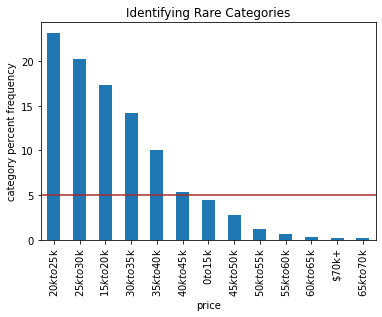

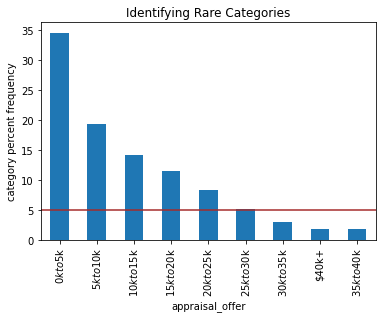

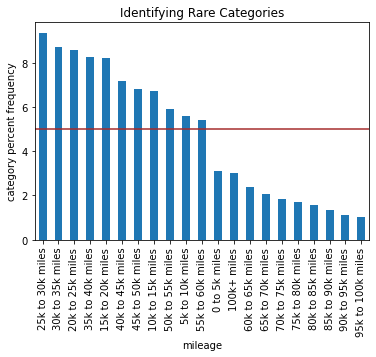

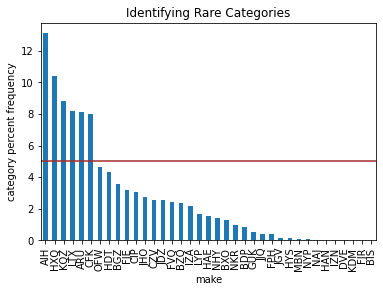

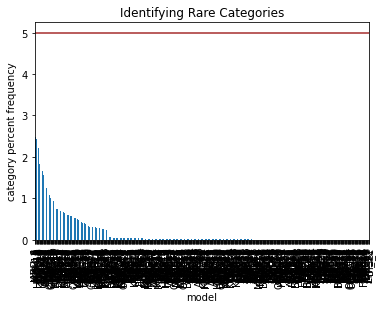

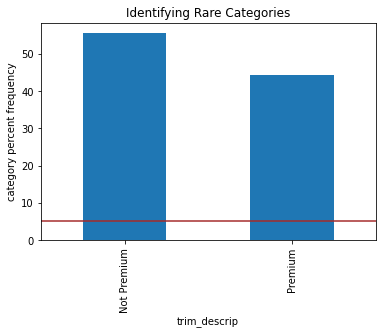

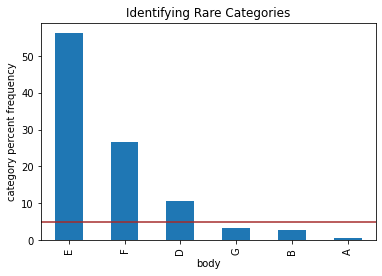

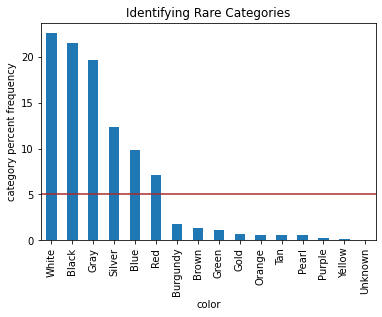

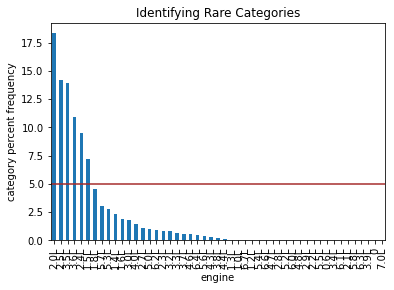

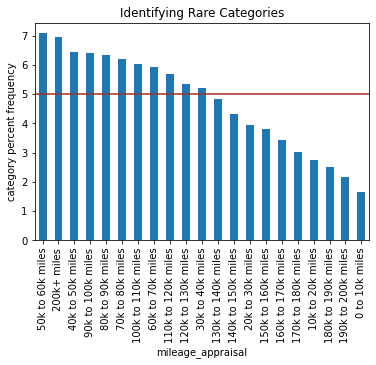

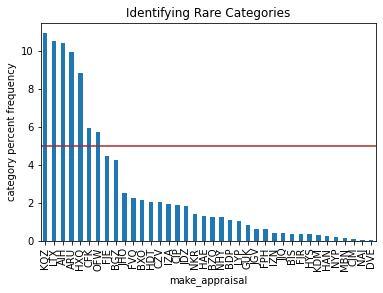

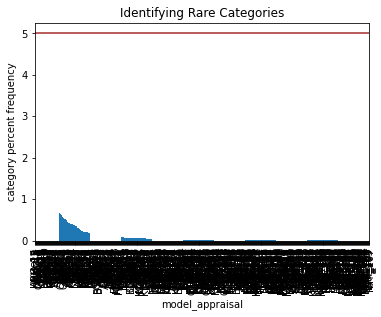

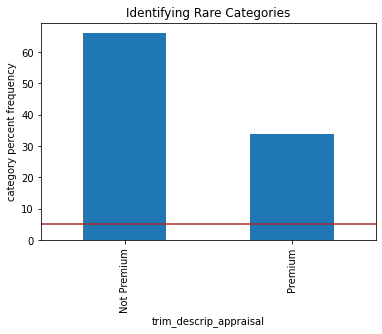

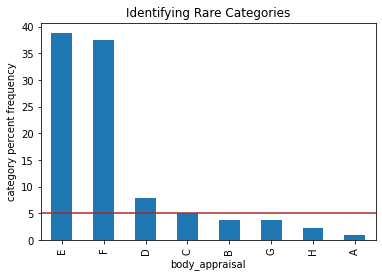

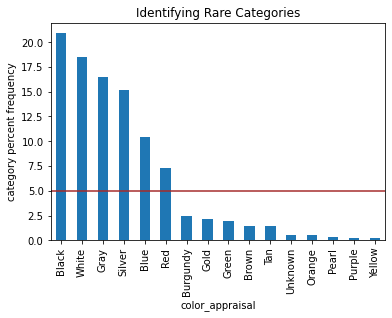

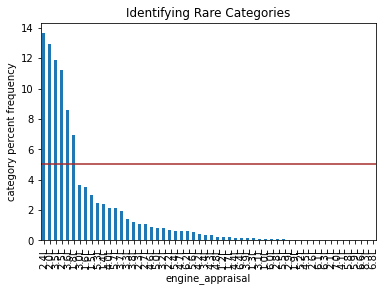

In [ ]:
for var in categorical:
  check_rare(var)

### <font color = 'Orange'>**Checking continuous variables distribution**

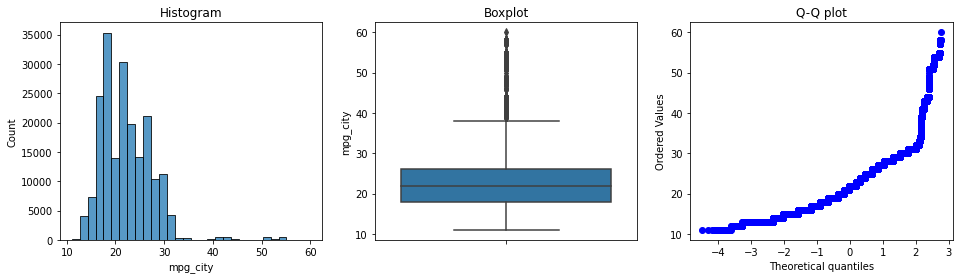

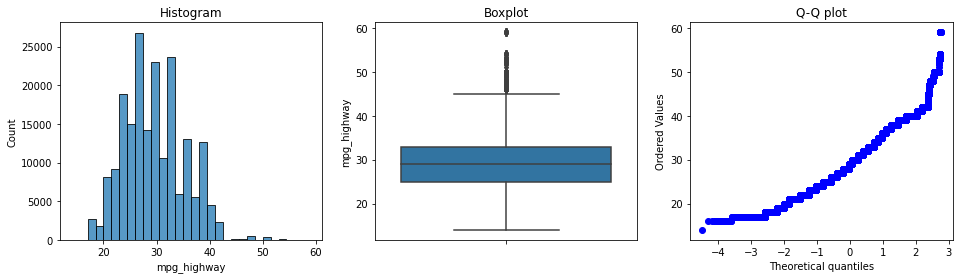

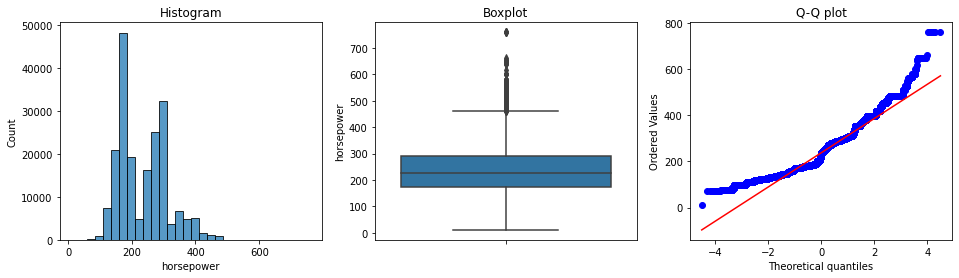

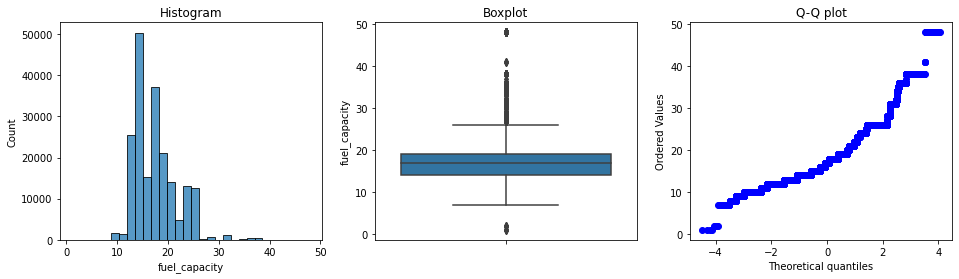

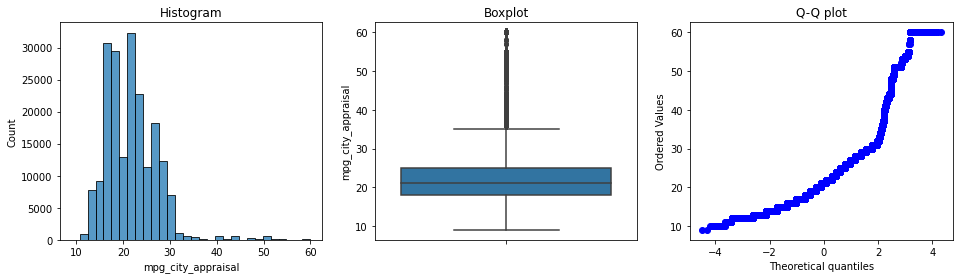

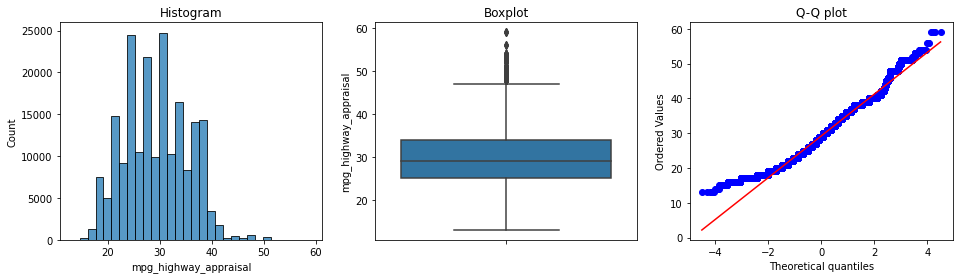

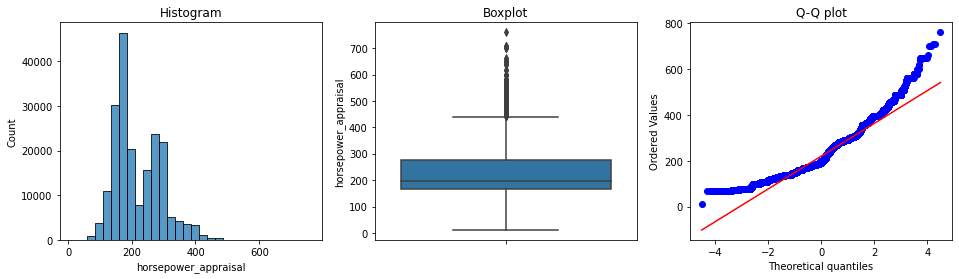

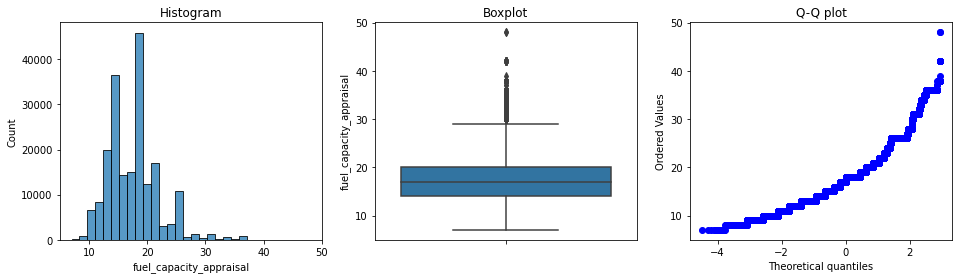

In [ ]:
for var in continuous:
  diagnostic_plots(cm, var)

### <font color = 'Orange'>**Checking discrete variable distribution**

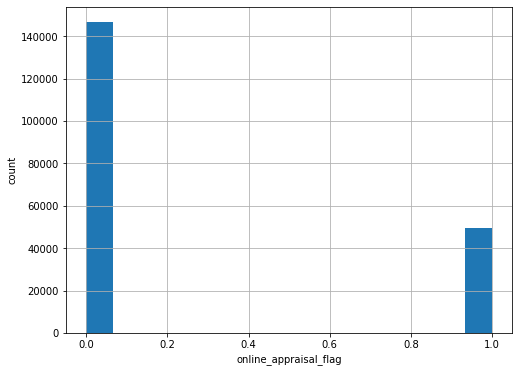

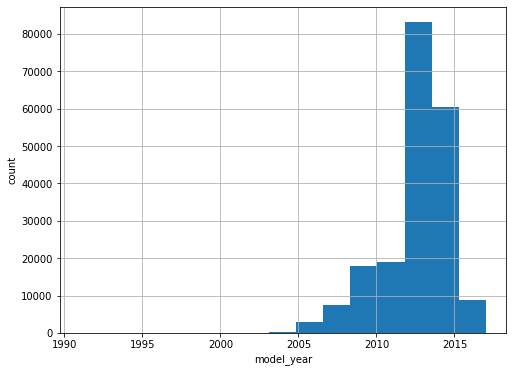

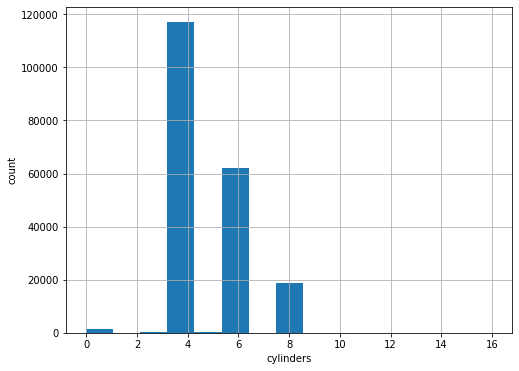

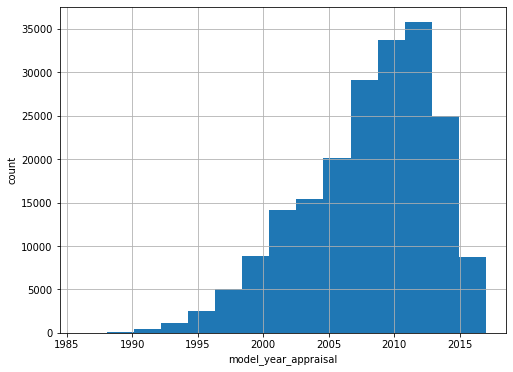

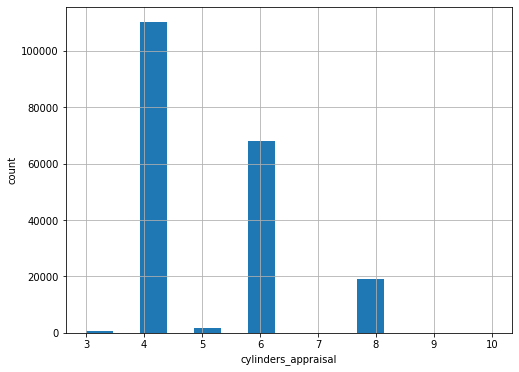

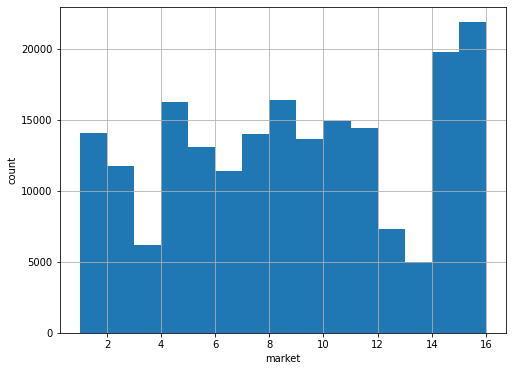

In [ ]:
for var in discrete:
  fig=cm[var].hist(bins=15, figsize=(8,6))
  fig.set_xlabel(var)
  fig.set_ylabel('count')
  plt.show()

## **<font color ='orange'>Visualizing Relationships between Variables**</font>

### **<font color ='orange'>Correlation Matrix**</font>

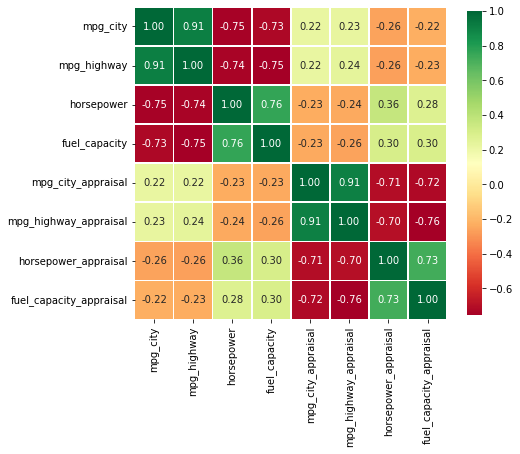

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(cm[continuous].corr(), annot=True, square=True, fmt='.2f', 
            cbar_kws={'shrink':0.80}, linewidth=.5, cmap='RdYlGn');

# **<font color ='orange'>Conclussion:**</font>

* I will split the data using all appraisal variables and only one non apprasal value as my target variable. I want to see how well I can predict the non-apprasial variable given only the appraisal information. I will not do missing value imputation on target variables.  


Missing Values 

1. online_appraisal_flag: this variable I am assuing this was human error and that appraisals online are flagged automatically so this missing values will be change to in-person
2. trim_descrip_appraisal: I will use random inputer since it is only a 2 category variable and the categories are very close together
3. model_appraisal, and color_appraisal: I will use a categorical imputer most frequent
4. mpg_city_appraisal and fuel_capacity_appraisal: I will use median imputation.
5. model_appraisal, and Trim_descrip_appraisal an have more than 5% missing values, so I will add a missing indicator to this variables

Transformation

1. drop all non_appraisal variables as I want to predict these variables from the appraisal variables
2. Missing values imputers as explained and in the orther above
2. mpg_city_appraisal and mpg_highway_appraisal, so I will create a new variable average_mpg and average_mpg_apprasial and use the average on prediction.
3. OneHot encoder for categorical variables
4. Log Transformation for conuous variables
5. winsorization on continuous variables
6. Standarscaler on continous variables
7. regression or classification method 


# **<font color ='orange'>First Split Target Variable PRICE**</font>

In [15]:
# Before we do any data cleaning we need to split the data into test and train datasets
X=cm.drop(['price'], axis=1)
y=cm['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=0, stratify=y)

## **<font color ='orange'>Pipleline 1.0:**</font>

In [15]:
columns_to_drop = [ 'model_year','mileage', 'make', 'model', 'trim_descrip', 'body', 'color', 'engine',
       'cylinders', 'mpg_city', 'mpg_highway', 'horsepower', 'fuel_capacity', 'market','model_appraisal']
       #price used as target
       #model_appraisal was dropped because the whole variable is rare

In [16]:
var_rare_labels=['engine_appraisal', 'color_appraisal', 'body_appraisal', 'make_appraisal', 'mileage_appraisal']

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
class CustomTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        # Perform arbitary transformation
        X['average_mpg_appraisal']=X[['mpg_city_appraisal', 'mpg_highway_appraisal']].mean(axis=1)
        return X

In [ ]:
price_pipeline0 = Pipeline([
    ('drop_features',
     DropFeatures(columns_to_drop)),

    ('imputer_arbit_class',
      ArbitraryNumberImputer(arbitrary_number=0, variables=['online_appraisal_flag'])),

    ('imputer_random_sample',
     RandomSampleImputer(random_state=123, variables=['trim_descrip_appraisal'])),

    ('imputer_categorical_frequent',
     CategoricalImputer(imputation_method='frequent', variables=['color_appraisal'])),

    ('imputer_missing_indicator',
     AddMissingIndicator(variables=['trim_descrip_appraisal'])),

    ('imputer_median',
     MeanMedianImputer(imputation_method= 'median', variables=['mpg_city_appraisal', 'fuel_capacity_appraisal'])),

    ('rare_lable_encoder',
      RareLabelEncoder(tol=0.05, n_categories=2, variables=var_rare_labels, ignore_format=True)),

    ('adding_Average_mpg_variable',
     CustomTransformer()),

    ('drop_mpg_city_highway',
     DropFeatures(features_to_drop=['mpg_city_appraisal', 'mpg_highway_appraisal'])),

    ('ohe',
     OneHotEncoder(variables=[ 'appraisal_offer', 'mileage_appraisal','make_appraisal','trim_descrip_appraisal', 
                              'body_appraisal','color_appraisal','engine_appraisal'])),
                            
    ('log_transformer',
     LogTransformer(variables=[ 'average_mpg_appraisal','horsepower_appraisal','fuel_capacity_appraisal'])),

    ('outlier',
     Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=[ 'average_mpg_appraisal', 'horsepower_appraisal','fuel_capacity_appraisal'])),

    ('scalar',
     SklearnTransformerWrapper(MinMaxScaler(), variables=['average_mpg_appraisal','horsepower_appraisal','fuel_capacity_appraisal'])),

    ('knn',
     KNeighborsClassifier())
])

## <font color = 'pickle'>**Hyperparameter Tuning - Round 1.0**

### <font color = 'pickle'>**Specify Param Grid**

In [ ]:
# now we create the grid with all the parameters that we would like to test
# In this round I will try to overfit the model to see if this data is capable of making this type of preddiction

param_grid_0 = {
    'scalar__transformer': [StandardScaler(), MinMaxScaler()], 
    'knn__n_neighbors': [1], 
    'knn__weights': ['uniform', 'distance'], 
    'knn__p': [1, 2] 
} 
# now we set up the grid search with cross-validation
grid_knn_0 = GridSearchCV(price_pipeline0, param_grid_0,
                           cv=5, return_train_score= True)

### <font color = 'pickle'>**Fit Model**

In [ ]:
grid_knn_0.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('drop_features',
                                        DropFeatures(features_to_drop=['model_year',
                                                                       'mileage',
                                                                       'make',
                                                                       'model',
                                                                       'trim_descrip',
                                                                       'body',
                                                                       'color',
                                                                       'engine',
                                                                       'cylinders',
                                                                       'mpg_city',
                                                                       'mpg_highway',
                                                                       'horsepower',
                                                                       'fuel_capacity',
                                                                       'market',
                                                                       'model_appraisal'])),
                                       ('imputer_arbit_class',
                                        ArbitraryNumberImputer(arbitrary_number=0,
                                                               variables=['online_a...
                                       ('scalar',
                                        SklearnTransformerWrapper(transformer=MinMaxScaler(),
                                                                  variables=['average_mpg_appraisal',
                                                                             'horsepower_appraisal',
                                                                             'fuel_capacity_appraisal'])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance'],
                         'scalar__transformer': [StandardScaler(),
                                                 MinMaxScaler()]},
             return_train_score=True)

### <font color = 'pickle'>**Get Best Params**

In [ ]:
#Let's check the best_parameters from GridSearchCv for our model
print(grid_knn_0.best_params_)

{'knn__n_neighbors': 1, 'knn__p': 1, 'knn__weights': 'uniform', 'scalar__transformer': StandardScaler()}


### <font color = 'pickle'>**Save Model**

In [ ]:
#run this for reload
file_best_estimator_round0 = save_model_folder / 'knn_round0_best_estimator.pkl'
file_complete_grid_round0 = save_model_folder / 'knn_round0_complete_grid.pkl'

In [ ]:
#do not run for reloads
joblib.dump(grid_knn_0.best_estimator_, file_best_estimator_round0)
joblib.dump(grid_knn_0, file_complete_grid_round0)

['/content/drive/MyDrive/CarMax/models/knn_round0_complete_grid.pkl']

### <font color = 'pickle'>**Load Saved Model**

In [ ]:
#run this for reload
loaded_best_estimator_round0 = joblib.load(file_best_estimator_round0)
loaded_complete_grid_round0 = joblib.load(file_complete_grid_round0)

### <font color = 'pickle'>**Plot Learning Curve**

In [ ]:
plot_learning_curve(loaded_best_estimator_round0, 'Learning Curves KNN', X_train, y_train, n_jobs=-1)

### <font color = 'pickle'>**Check Cross Validation Score and Train Score**

In [ ]:
#let's check the train scores
print(loaded_best_estimator_round0.score(X_train,y_train))

#let's check the cross validation score
print(loaded_complete_grid_round0.best_score_) #estimator for best validation score never on the test data

0.8730746268656716
0.23430597014925372


## **<font color ='orange'>Pipleline 1.1:**</font>

In [14]:
cms=cm.sample(n=20000, random_state=1)
X=cms.drop(['price'], axis=1)
y=cms['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=0, stratify=y)

In [15]:
X.shape

(20000, 29)

In [16]:
columns_to_drop = [ 'model_year','mileage', 'make', 'model', 'trim_descrip', 'body', 'color', 'engine',
       'cylinders', 'mpg_city', 'mpg_highway', 'horsepower', 'fuel_capacity', 'market','model_appraisal']
       #price used as target
       #model_appraisal was dropped because the whole variable is rare

In [17]:
var_rare_labels=['engine_appraisal', 'color_appraisal', 'body_appraisal', 'make_appraisal', 'mileage_appraisal']

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
class CustomTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        # Perform arbitary transformation
        X['average_mpg_appraisal']=X[['mpg_city_appraisal', 'mpg_highway_appraisal']].mean(axis=1)
        return X

In [19]:
poly_transformer = ColumnTransformer( transformers=[('transformer', PolynomialFeatures(degree = 2),
                                                   ['appraisal_offer', 'mileage_appraisal', 'average_mpg_appraisal', 'trim_descrip_appraisal'])]        
                                                   ,remainder = 'passthrough')

In [20]:

price_pipeline_preprocess = Pipeline([
    ('drop_features',
     DropFeatures(columns_to_drop)),

    ('imputer_arbit_class',
      ArbitraryNumberImputer(arbitrary_number=0, variables=['online_appraisal_flag'])),

    ('imputer_random_sample',
     RandomSampleImputer(random_state=123, variables=['trim_descrip_appraisal'])),

    ('imputer_categorical_frequent',
     CategoricalImputer(imputation_method='frequent', variables=['color_appraisal'])),

    ('imputer_missing_indicator',
     AddMissingIndicator(variables=['trim_descrip_appraisal'])),

    ('imputer_median',
     MeanMedianImputer(imputation_method= 'median', variables=['mpg_city_appraisal', 'fuel_capacity_appraisal'])),

    ('rare_lable_encoder',
      RareLabelEncoder(tol=0.05, n_categories=2, variables=var_rare_labels, ignore_format=True)),

    ('adding_Average_mpg_variable',
     CustomTransformer()),

    ('drop_mpg_city_highway',
     DropFeatures(features_to_drop=['mpg_city_appraisal', 'mpg_highway_appraisal'])),

    ('one_hot_encoder',
      OneHotEncoder(
                    variables=['appraisal_offer', 'mileage_appraisal','make_appraisal','trim_descrip_appraisal', 
                              'body_appraisal','color_appraisal','engine_appraisal'],
                    ignore_format=True, drop_last=True)),
  
    ('log_transformer',
     LogTransformer(variables=[ 'average_mpg_appraisal','horsepower_appraisal','fuel_capacity_appraisal'])),

    ('outlier',
     Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=[ 'average_mpg_appraisal', 'horsepower_appraisal','fuel_capacity_appraisal'])),

    ('scalar',
     SklearnTransformerWrapper(MinMaxScaler(), variables=['average_mpg_appraisal','horsepower_appraisal','fuel_capacity_appraisal'])),
])

In [21]:
from pandas.core.common import random_state

price_pipeline_rf = Pipeline([
    ('drop_features',
     DropFeatures(columns_to_drop)),

    ('imputer_arbit_class',
      ArbitraryNumberImputer(arbitrary_number=0, variables=['online_appraisal_flag'])),

    ('imputer_random_sample',
     RandomSampleImputer(random_state=123, variables=['trim_descrip_appraisal'])),

    ('imputer_categorical_frequent',
     CategoricalImputer(imputation_method='frequent', variables=['color_appraisal'])),

    ('imputer_missing_indicator',
     AddMissingIndicator(variables=['trim_descrip_appraisal'])),

    ('imputer_median',
     MeanMedianImputer(imputation_method= 'median', variables=['mpg_city_appraisal', 'fuel_capacity_appraisal'])),

    ('rare_lable_encoder',
      RareLabelEncoder(tol=0.05, n_categories=2, variables=var_rare_labels, ignore_format=True)),

    ('adding_Average_mpg_variable',
     CustomTransformer()),

    ('drop_mpg_city_highway',
     DropFeatures(features_to_drop=['mpg_city_appraisal', 'mpg_highway_appraisal'])),

    ('one_hot_encoder',
      OneHotEncoder(
                    variables=['appraisal_offer', 'mileage_appraisal','make_appraisal','trim_descrip_appraisal', 
                              'body_appraisal','color_appraisal','engine_appraisal'],
                    ignore_format=True, drop_last=True)),
  
    ('log_transformer',
     LogTransformer(variables=[ 'average_mpg_appraisal','horsepower_appraisal','fuel_capacity_appraisal'])),

    ('outlier',
     Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=[ 'average_mpg_appraisal', 'horsepower_appraisal','fuel_capacity_appraisal'])),

    ('scalar',
     SklearnTransformerWrapper(MinMaxScaler(), variables=['average_mpg_appraisal','horsepower_appraisal','fuel_capacity_appraisal'])),

    ('rf',
     RandomForestClassifier(oob_score=True, random_state=1))
])

In [22]:
# Preprocessing - Train data
X_train_processed = price_pipeline_preprocess.fit_transform(X_train)

In [25]:
train_scores = []
oob_scores = []
best_oob_score = 0
best_n_estimators = 50

rf = RandomForestClassifier(warm_start=True, random_state=0, oob_score=True) #warm start=True, it will fit model adding on previous model so less tree are build  
estimator_range = range(50, 1000, 10)
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train_processed, y_train)
    train_scores.append(rf.score(X_train_processed, y_train))
    oob_scores.append(rf.oob_score_)
    if rf.oob_score_ > best_oob_score:
        best_n_estimators = n_estimators
        best_oob_score = rf.oob_score_         
# Bagging with replacement, some observations may never be trained and some samples will be trained multiple times

In [26]:
print(best_n_estimators)

540


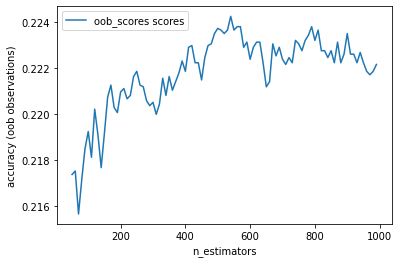

In [27]:
plt.plot(estimator_range, oob_scores, label="oob_scores scores")
plt.ylabel("accuracy (oob observations)")
plt.xlabel("n_estimators")
plt.legend()
plt.show()

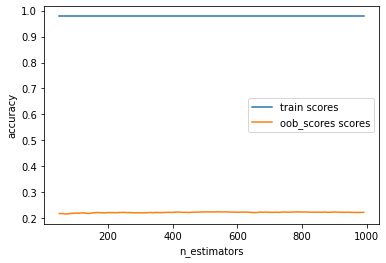

In [28]:
plt.plot(estimator_range, train_scores, label="train scores")
plt.plot(estimator_range, oob_scores, label="oob_scores scores")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()
plt.show()

## <font color = 'pickle'>**Hyperparameter Tuning - Round 1.1**

### <font color = 'pickle'>**Specify Param Grid**

In [29]:
# now we create the grid with all the parameters that we would like to test
# In this round I will try to overfit the model to see if this data is capable of making this type of preddiction

param_grid_1= {
    'rf__n_estimators' :[540],
    'rf__max_features' : ["sqrt", "log2",None],
    'rf__max_depth': np.arange(2,10),
    'rf__min_samples_leaf': np.arange(2,20),
    'rf__max_leaf_nodes': np.arange(2, 20),
    'rf__min_impurity_decrease': loguniform(0.00001, 0.1),
    }
# now we set up the grid search with cross-validation
#folds=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.4, train_size=0.5)
grid_knn_1 = RandomizedSearchCV(price_pipeline_rf, param_grid_1,
                           cv=5, return_train_score= True, n_jobs=-1, n_iter=500)

### <font color = 'pickle'>**Fit Model**

In [ ]:
grid_knn_1.fit(X_train, y_train)

### <font color = 'pickle'>**Get Best Params**

In [ ]:
#Let's check the best_parameters from GridSearchCv for our model
print(grid_knn_1.best_params_)

### <font color = 'pickle'>**Save Model**

In [ ]:
#run this for reload
file_best_estimator_round1 = save_model_folder / 'knn_round1_best_estimator.pkl'
file_complete_grid_round1 = save_model_folder / 'knn_round1_complete_grid.pkl'

In [ ]:
#do not run for reloads
joblib.dump(grid_knn_1.best_estimator_, file_best_estimator_round1)
joblib.dump(grid_knn_1, file_complete_grid_round1)

### <font color = 'pickle'>**Load Saved Model**

In [ ]:
#run this for reload
loaded_best_estimator_round1 = joblib.load(file_best_estimator_round1)
loaded_complete_grid_round1 = joblib.load(file_complete_grid_round1)

### <font color = 'pickle'>**Plot Learning Curve**

KeyboardInterrupt: ignored

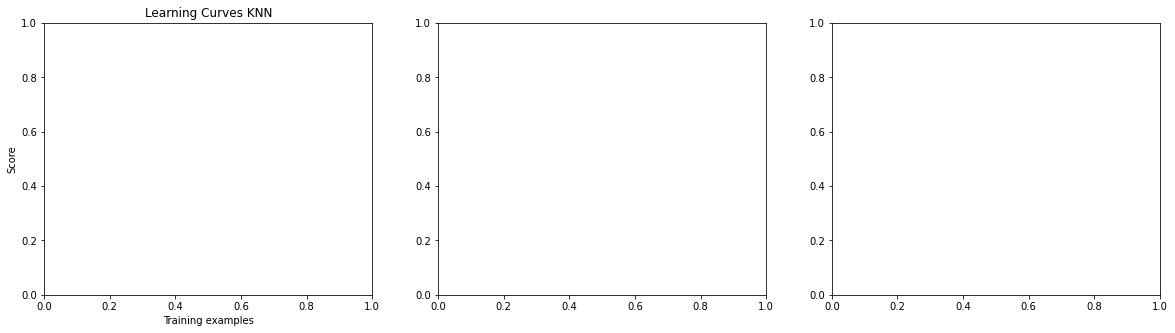

In [129]:
plot_learning_curve(loaded_best_estimator_round1, 'Learning Curves KNN', X_train, y_train, n_jobs=-1)

### <font color = 'pickle'>**Check Cross Validation Score and Train Score**

In [ ]:
#let's check the train scores
print(f"Accuracy on Training set:{loaded_best_estimator_round1.score(X_train,y_train)}")

#let's check the cross validation score
print(f"Accuracy on Validation set:{loaded_complete_grid_round1.best_score_}") #estimator for best validation score never on the test data